In [33]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import integrate

In [34]:
c=2  ##Constant in Gamma function

def f(x):
    return x**(c-1)*math.e**(-x)


In [35]:
a=0  #lower bound of integral
b=5  #upper bound of integral
N=1000

In [36]:
#Gaussian quadrature
def GaussQuad(N):
    return integrate.fixed_quad(f,a,b,n=N)[0]

print(GaussQuad(N))

0.9595723180056609


In [37]:
#Trapezoid rule
def Trapezoid(N):
    h=(b-a)/N
    s=0.5*f(a)+0.5*f(b)
    for k in range(1,int(N)):
        s+=f(a+k*h)

    return h*s


print(Trapezoid(N))

0.9595701785252103


In [38]:
#Simpson's rule
def Simpson(N):
    h=(b-a)/N
    s=f(a)+f(b)
    for k in range(1,int(N)):
        if (k%2!=0):
            s+=4*f(a+k*h)
        else:
            s+=2*f(a+k*h)
    return 1/3*h*s

print(Simpson(N))

0.959572317995024


In [39]:
#Romberg rule
print(integrate.romberg(f,a,b))



0.959572318005377


In [40]:
#Simple Monte Carlo

def MonteCarlo(N):
    f_vec=np.vectorize(f)
    t=np.linspace(a,b,100)
    frange=f_vec(t)

    min=frange.min()
    max=frange.max()

    A=(b-a)*(max-min)

    x=np.random.random(size=N)*(b-a)+a
    y=np.random.random(size=N)*(max-min)+min

    count=len(y[y<=f(x)])
    I=count*A/N
    return I

print(MonteCarlo(N))

0.9527594710414775


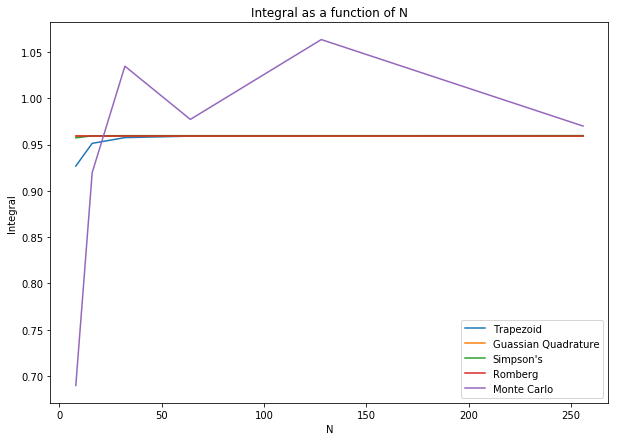

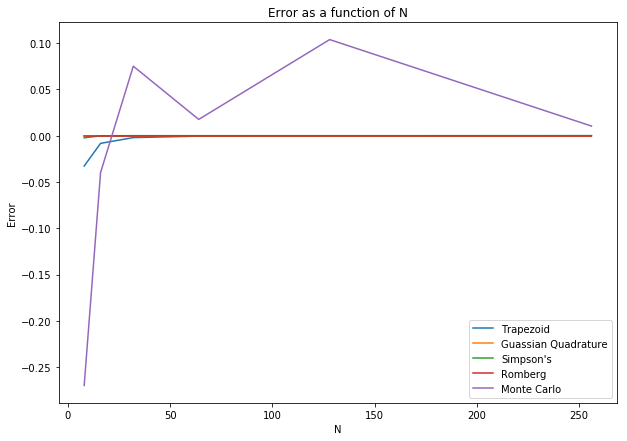

In [56]:
##PART A
##Plot the Integral as a function of N

trap=[]
gaussq=[]
simp=[]
romb=[]
mont=[]

Nrange=[8,16,32,64,128,256]

for i in range(6):
    trap=np.append(trap,Trapezoid(Nrange[i]))
    gaussq=np.append(gaussq,GaussQuad(Nrange[i]))
    simp=np.append(simp,Simpson(Nrange[i]))
    romb=np.append(romb,integrate.romberg(f,a,b))
    mont=np.append(mont,MonteCarlo(Nrange[i]))

plt.plot(Nrange,trap, label="Trapezoid")
plt.plot(Nrange,gaussq, label="Guassian Quadrature")
plt.plot(Nrange,simp,label="Simpson's")
plt.plot(Nrange,romb,label="Romberg")
plt.plot(Nrange,mont,label="Monte Carlo")
plt.rcParams["figure.figsize"]=[10,7]
plt.title("Integral as a function of N")
plt.xlabel("N")
plt.ylabel("Integral")
plt.legend()
plt.show()


##Analytical Solution
I=-6*np.e**(-5)+1
Ireal=[I,I,I,I,I,I]

##Plotting the error

plt.plot(Nrange,trap-Ireal, label="Trapezoid")
plt.plot(Nrange,gaussq-Ireal, label="Guassian Quadrature")
plt.plot(Nrange,simp-Ireal,label="Simpson's")
plt.plot(Nrange,romb-Ireal,label="Romberg")
plt.plot(Nrange,mont-Ireal,label="Monte Carlo")
plt.rcParams["figure.figsize"]=[10,7]
plt.title("Error as a function of N")
plt.xlabel("N")
plt.ylabel("Error")
plt.legend()
plt.show()



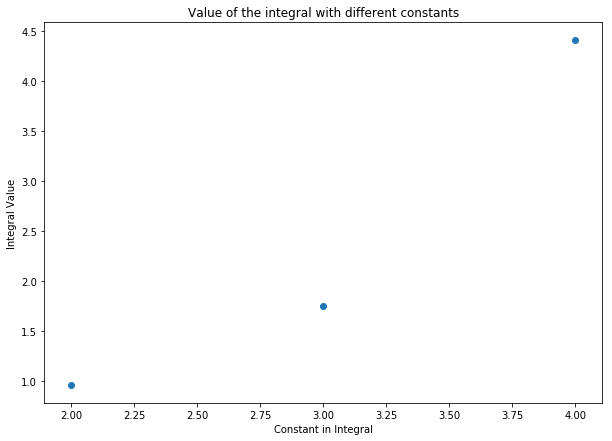

In [68]:
##Part B
##The Romberg method is most accurate
##Now I calculate the integral with different constants


c=2
I1=integrate.romberg(f,a,b)

c=3
I2=integrate.romberg(f,a,b)

c=4
I3=integrate.romberg(f,a,b)

plt.scatter([2,3,4],[I1,I2,I3])
plt.xlabel("Constant in Integral")
plt.ylabel("Integral Value")
plt.title("Value of the integral with different constants")
plt.show()


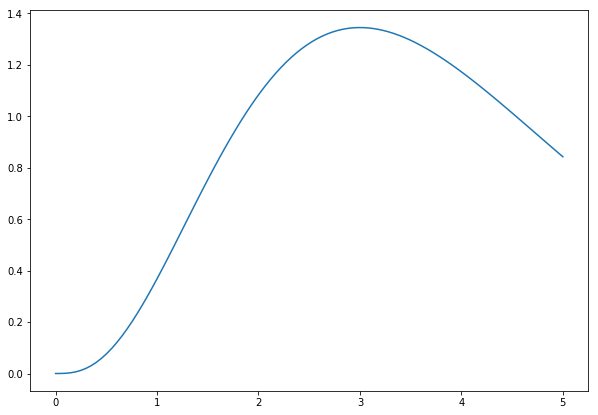

In [69]:
f_vec=np.vectorize(f)
t=np.linspace(a,b,100)

plt.plot(t,f_vec(t))

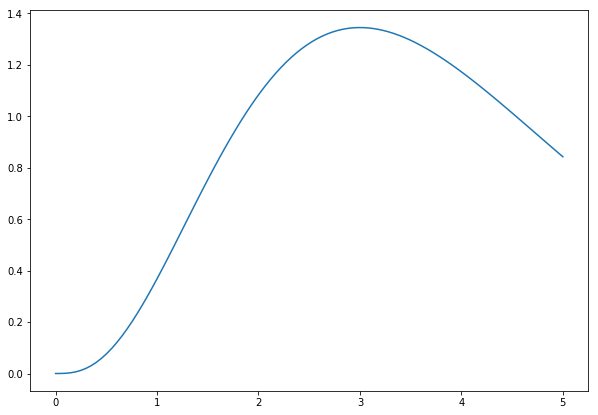

In [70]:
def f2(x):
    return math.e**(x**(c-1)*math.e**(-x))

f2_vec=np.vectorize(f)
t=np.linspace(a,b,100)

plt.plot(t,f2_vec(t))